<a href="https://colab.research.google.com/github/anvi2003/EDA-Heart-failure-and-Prediction/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> EDA Minor Project </h1>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
heart_data=pd.read_csv('/content/data.csv')


<h1>TASK 1</h1>

In [ ]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
heart_data.shape

(303, 14)

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
data_dup=heart_data.duplicated().any()
print(data_dup)

True


In [ ]:
heart_data=heart_data.drop_duplicates()

In [ ]:
heart_data.shape

(302, 14)

<h3>Q1: Visualize the distribution of heart attack occurrences in the dataset </h3>

In [ ]:
heart_attack_counts=heart_data['output'].value_counts()

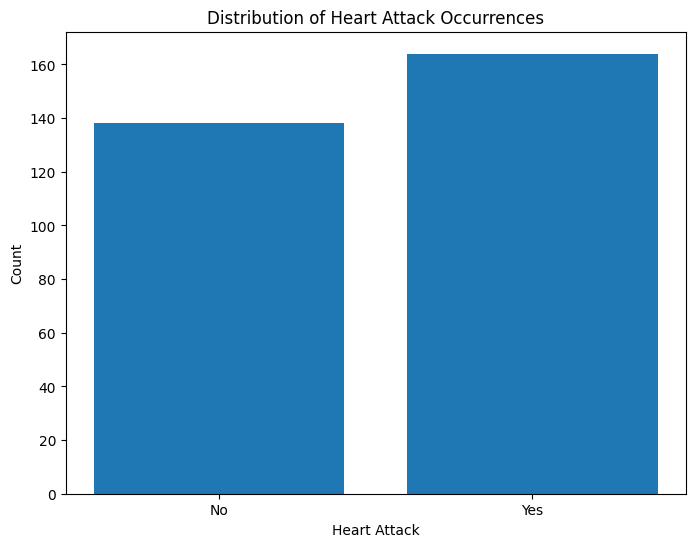

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(heart_attack_counts.index, heart_attack_counts.values)
plt.xlabel('Heart Attack')
plt.ylabel('Count')
plt.title('Distribution of Heart Attack Occurrences')
plt.xticks([0, 1], ['No', 'Yes'])  # Assuming binary labels: 0 = No heart attack, 1 = Heart attack
plt.show()

<h3>Q2: Can we create visualizations to understand the relationship between different variables (e.g., age, cholesterol levels) and the likelihood of a heart attack?</h3>

<Axes: >

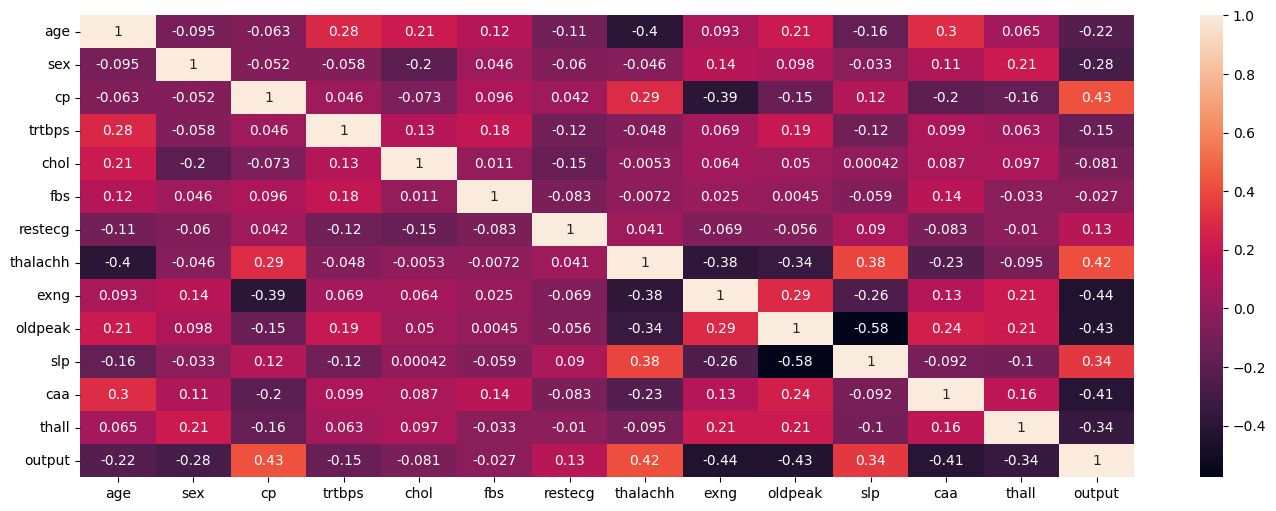

In [ ]:
plt.figure(figsize=(17,6))
sns.heatmap(heart_data.corr(),annot=True)

In [ ]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
heart_data['output'].value_counts()

1    164
0    138
Name: output, dtype: int64

In [ ]:
heart_data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

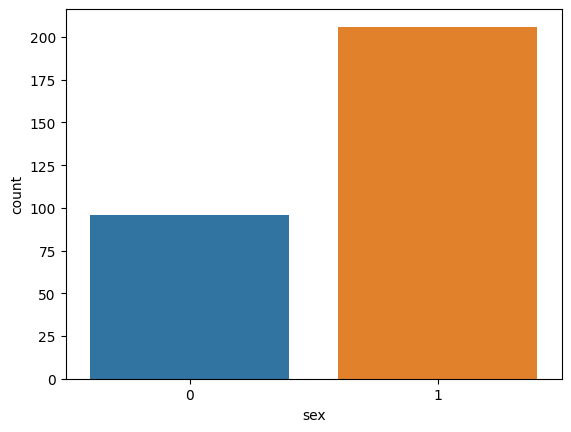

In [ ]:
sns.countplot(data=heart_data,x='sex')

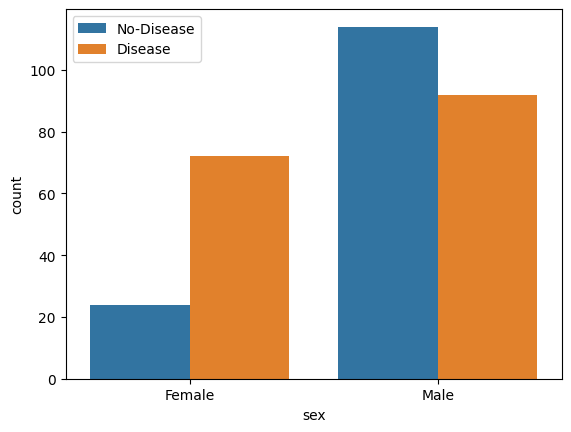

In [ ]:
sns.countplot(x='sex',hue='output',data=heart_data)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

<ipython-input-40-0abddd473552>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data['age'],bins=20)


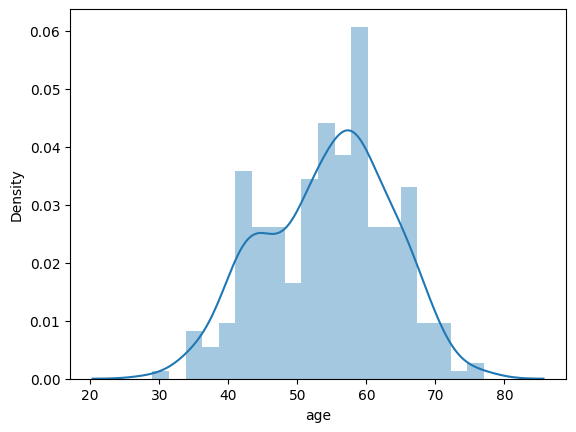

In [ ]:
sns.distplot(heart_data['age'],bins=20)
plt.show()

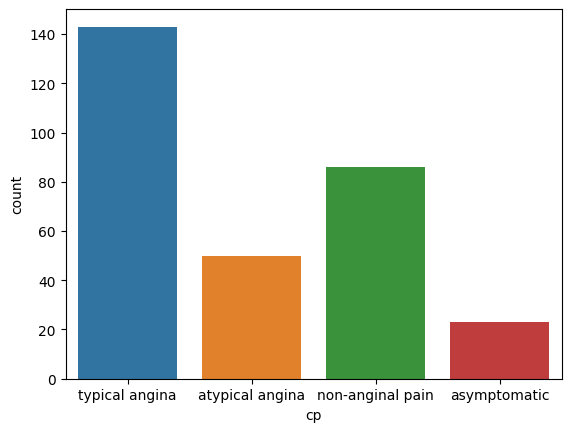

In [ ]:
sns.countplot(data=heart_data,x='cp')
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"])
plt.show()

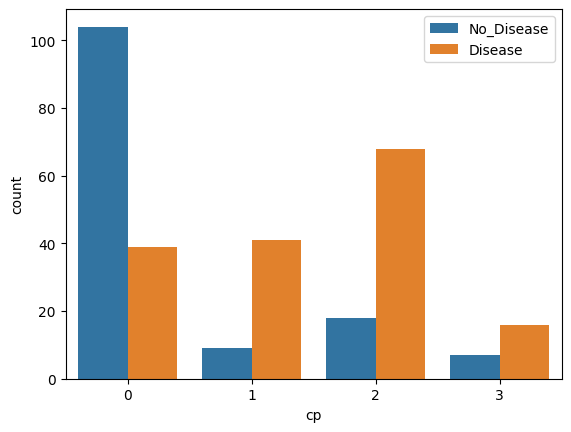

In [ ]:
sns.countplot(data=heart_data,x='cp',hue='output')
plt.legend(labels=["No_Disease","Disease"])
plt.show()

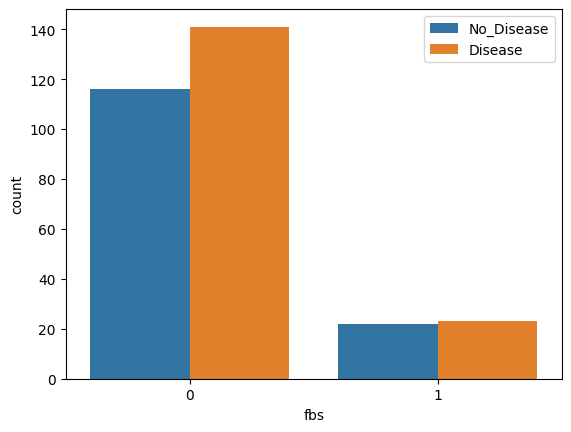

In [ ]:
sns.countplot(data=heart_data,x='fbs',hue='output')
plt.legend(labels=["No_Disease","Disease"])
plt.show()

<Axes: >

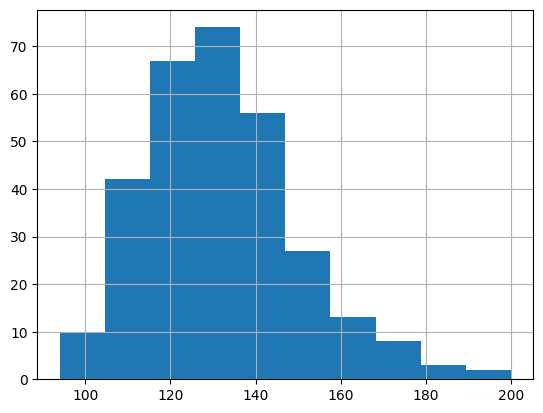

In [ ]:
heart_data['trtbps'].hist()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


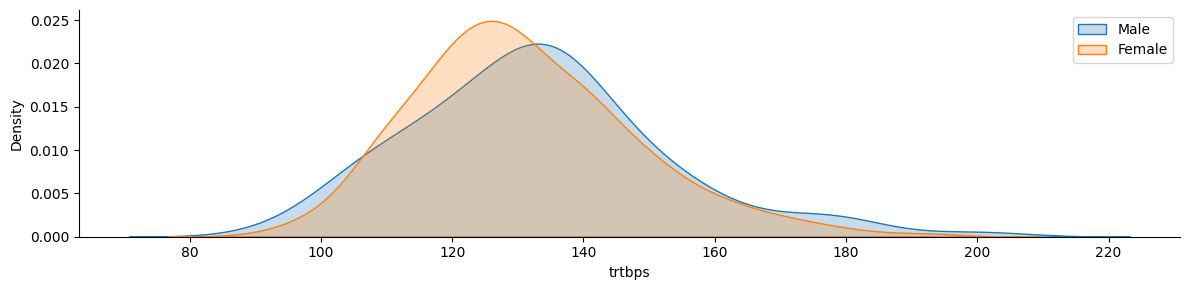

In [ ]:
g=sns.FacetGrid(heart_data,hue='sex',aspect=4)
g.map(sns.kdeplot,'trtbps',shade=True)
plt.legend(labels=['Male','Female'])

<Axes: >

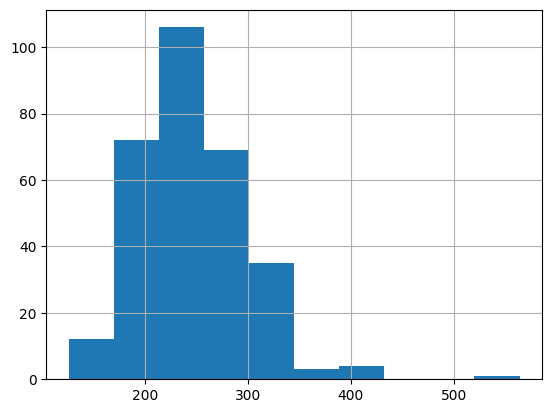

In [ ]:
heart_data['chol'].hist()

<h3>Q3 :Visualize realtion between age and sex in relation with chances of heart attack</h3>

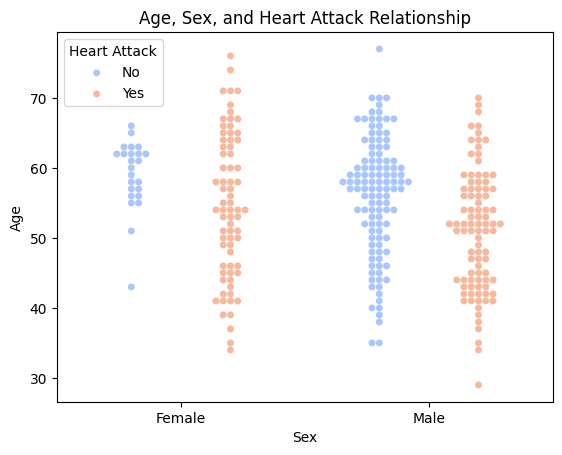

In [ ]:
sns.swarmplot(data=heart_data, x='sex', y='age', hue='output', palette='coolwarm', dodge=True)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.xticks([1,0],['Male','Female'])
plt.title('Age, Sex, and Heart Attack Relationship')
plt.legend(title='Heart Attack', labels=['No', 'Yes'])
plt.show()

<h3>Q 4: What are the key insights you can derive from the dataset in terms of its structure, size, and basic statistics? Create a summary report.</h3>

In [ ]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Some possible conclusions that might be drawn from the exploratory data analysis (EDA) carried out on the heart_data dataset:


Age Distribution: The dataset contains people whose ages range from 29 to 77, with a roughly 54-year-old average.


Gender Distribution: The dataset has a higher percentage of men (68%) than women (32%).


Chest Pain (cp) Category: Type 0 is the most prevalent type of chest pain that people describe, followed by types 2 and 1. This data can reveal the frequency and intensity of various types of chest discomfort in the population represented in the dataset.

Blood Pressure (trtbps): The range of values for resting blood pressure is 94 to 200 mm Hg, with an average value of roughly 131 mm Hg. Blood pressure readings can be analysed to learn more about hypertension and its possible connection to heart attacks.

Cholesterol Levels (chol): The dataset's median cholesterol level, which ranges from 126 to 564 mg/dl, is roughly 246 mg/dl. Examining the connection between high cholesterol and heart attacks could offer important insights because high cholesterol is frequently associated to cardiovascular disorders.

Fasting Blood Sugar (fbs): About 15% of the people in the dataset have fasting blood sugar readings that are higher than 120 mg/dl.


Maximum Heart Rate Attained (thalachh): The maximum heart rate attained ranges from 71 to 202 beats per minute, with an average of about 149 bpm.

Exercise-Induced Angina (exng): The dataset contains 33% of people who report having this condition. Understanding the relationship between angina and heart attacks can help us understand how physical activity affects heart health.


Heart disease presence: The collection contains data on whether heart disease is present (1) or not (0). The dataset contains people with heart disease in about 54% of the cases.

<h3>Q 5: Find relation between resting blood pressure (in mm Hg) and cholestoral in mg/dl fetched</h3>

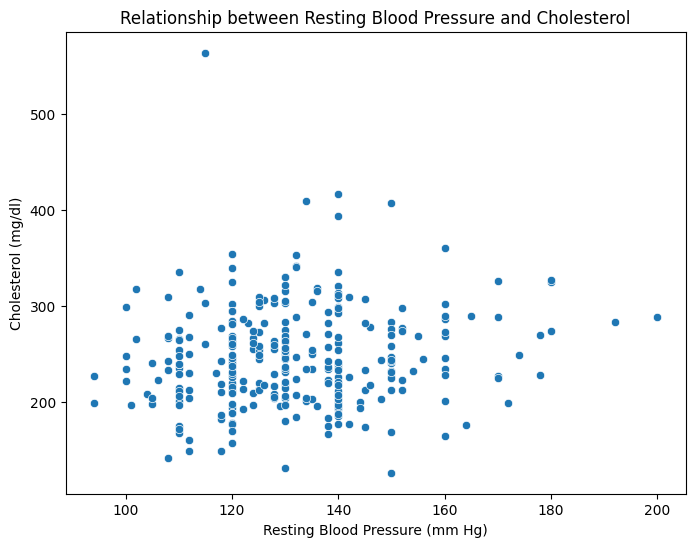

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=heart_data, x='trtbps', y='chol')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Cholesterol (mg/dl)')
plt.title('Relationship between Resting Blood Pressure and Cholesterol')
plt.show()

In [ ]:
x=heart_data.drop(columns='output',axis=1)
y=heart_data['output']

In [ ]:
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 302, dtype: int64

<h1>TASK 2: Classification/Regression</h1>

Data Processing and Feature Engineering done in the beginning

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(302, 13) (241, 13) (61, 13)


In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
x_train_pred=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_pred,y_train)

In [ ]:
print('Accuracy on Training data: ',training_data_accuracy)

Accuracy on Training data:  0.8506224066390041


In [ ]:
x_test_pred=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_pred,y_test)

In [ ]:
print('Accuracy on Test data: ',test_data_accuracy)

Accuracy on Test data:  0.819672131147541


<h3>SUMMARY: Comparing the training and test accuracies, it seems that the model did not significantly overfit or underfit the training data, as the test accuracy is relatively close to the training accuracy. This indicates that the model generalizes reasonably well to unseen data.</h3>